# Tensorflow for MNIST
tensorflow tutorial for mnist
reference: https://www.tensorflow.org/tutorials/keras/basic_classification?hl=ja

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# datasets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [8]:
# class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
# about data
train_images.shape
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

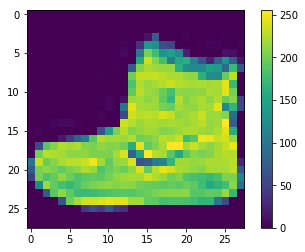

In [13]:
# visualize data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [14]:
# preprocess data
train_images = train_images / 255.0
test_images = test_images / 255.0

/Users/fkiyozawa/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


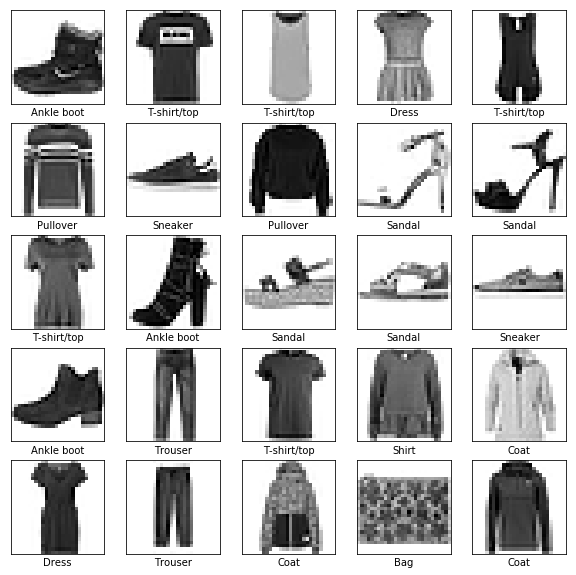

In [15]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [18]:
# define model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.4940 - acc: 0.8275
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3742 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3360 - acc: 0.8790
Epoch 4/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3131 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2953 - acc: 0.8917: 0s - loss: 


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 0s 28us/step
0.37644676532745364
0.8594


In [23]:
# prediction
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[2.5641598e-06 3.1455023e-08 6.4324882e-07 7.4200024e-08 9.3974727e-08
 1.0552280e-02 2.5826225e-06 4.7373041e-03 1.5779677e-05 9.8468864e-01]
9
9


/Users/fkiyozawa/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


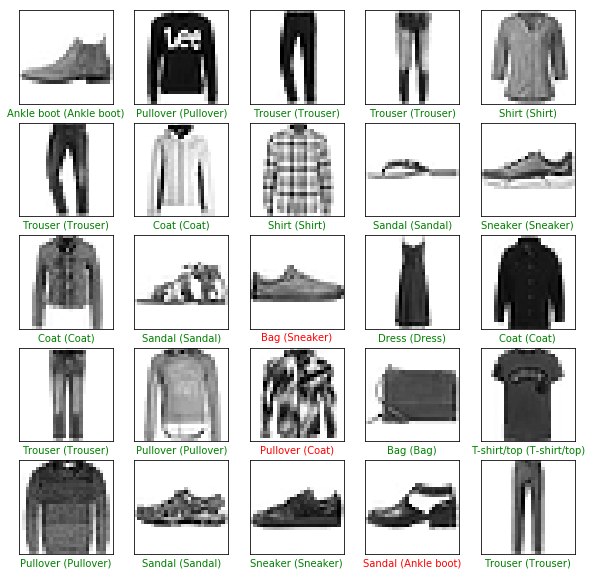

In [24]:
# visualize result
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    p_label = np.argmax(predictions[i])
    t_label = test_labels[i]
    if p_label == t_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[p_label], class_names[t_label]), color=color)

In [29]:
# prediction to a data
img = np.expand_dims(test_images[0], 0)
img.shape

(1, 28, 28)

In [31]:
prediction = model.predict(img)
print(prediction)
print(np.argmax(prediction[0]))

[[2.5641552e-06 3.1454970e-08 6.4324888e-07 7.4199896e-08 9.3974734e-08
  1.0552255e-02 2.5826155e-06 4.7372999e-03 1.5779633e-05 9.8468876e-01]]
9
